# Explore here

In [1]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
total_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
total_data.shape

(1338, 7)

In [4]:
total_data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [5]:
total_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
total_data[total_data['charges'].duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [7]:
duplicated_charge_id = total_data[total_data['charges'] == 1639.5631]
print(duplicated_charge_id)

     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631


In [8]:
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
grouped_counts = total_data.groupby(['sex']).size()
print(grouped_counts)
grouped_counts = total_data.groupby(['smoker']).size()
print()
print(grouped_counts)
print()
grouped_counts = total_data.groupby(['region']).size()
print(grouped_counts)
print()
grouped_counts = total_data.groupby(['age']).size()
print(grouped_counts)

sex
female    662
male      675
dtype: int64

smoker
no     1063
yes     274
dtype: int64

region
northeast    324
northwest    324
southeast    364
southwest    325
dtype: int64

age
18    69
19    67
20    29
21    28
22    28
23    28
24    28
25    28
26    28
27    28
28    28
29    27
30    27
31    27
32    26
33    26
34    26
35    25
36    25
37    25
38    25
39    25
40    27
41    27
42    27
43    27
44    27
45    29
46    29
47    29
48    29
49    28
50    29
51    29
52    29
53    28
54    28
55    26
56    26
57    26
58    25
59    25
60    23
61    23
62    23
63    23
64    22
dtype: int64


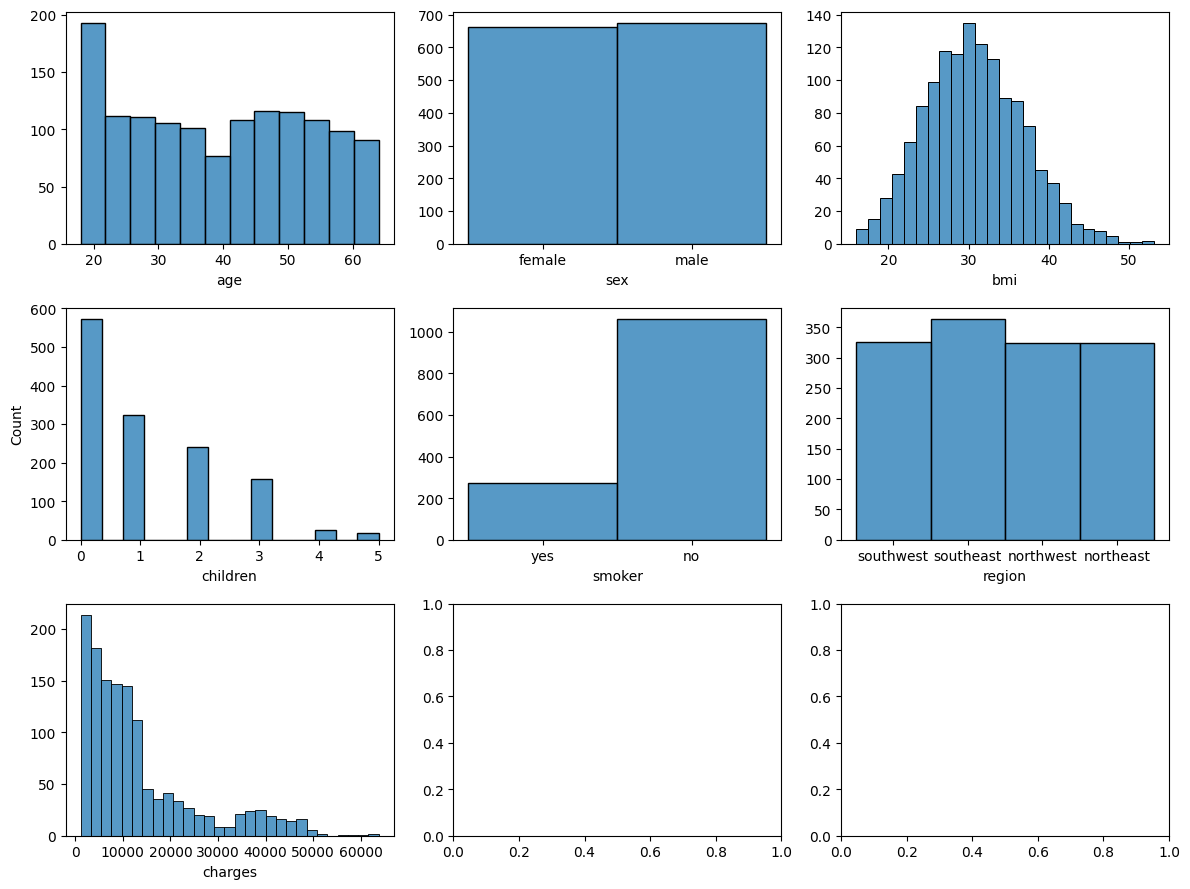

In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(3, 3, figsize = (12, 9))

sns.histplot(ax = axis[0, 0], data = total_data, x = "age").set(ylabel = None)
sns.histplot(ax = axis[0, 1], data = total_data, x = "sex").set(ylabel = None)
sns.histplot(ax = axis[0, 2], data = total_data, x = "bmi").set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = total_data, x = "children")
sns.histplot(ax = axis[1, 1], data = total_data, x = "smoker").set(ylabel = None)
sns.histplot(ax = axis[1, 2], data = total_data, x = "region").set(ylabel = None)
sns.histplot(ax = axis[2, 0], data = total_data, x = "charges").set(ylabel = None)

plt.tight_layout()

plt.show()

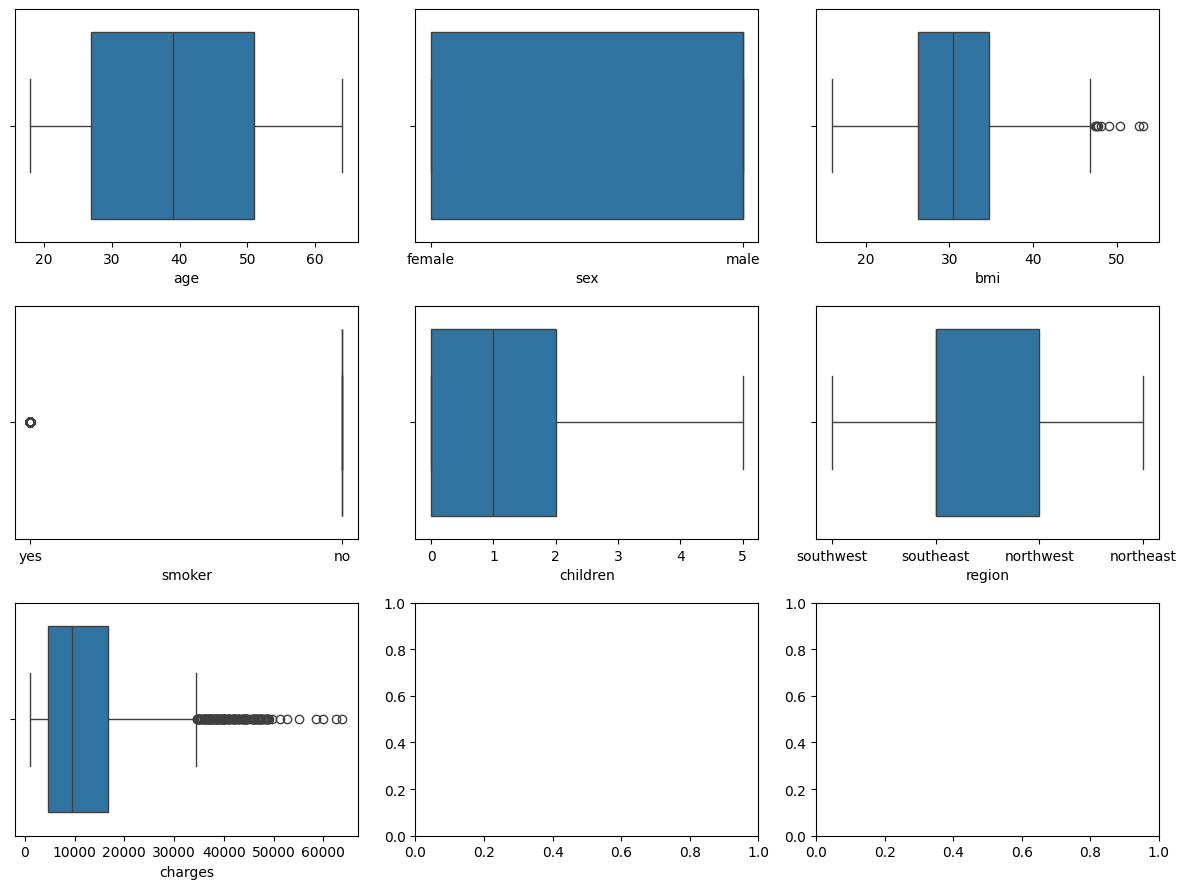

In [11]:
fig, axis = plt.subplots(3, 3, figsize = (12, 9))

sns.boxplot(ax = axis[0, 0], data= total_data, x="age").set(ylabel = None)
sns.boxplot(ax = axis[0, 1], data = total_data, x = "sex").set(ylabel = None)
sns.boxplot(ax = axis[0, 2], data = total_data, x = "bmi").set(ylabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "smoker")
sns.boxplot(ax = axis[1, 1], data = total_data, x = "children").set(ylabel = None)
sns.boxplot(ax = axis[1, 2], data = total_data, x = "region").set(ylabel = None)
sns.boxplot(ax = axis[2, 0], data = total_data, x = "charges").set(ylabel = None)

plt.tight_layout()

plt.show()

After analysis of the above plots, it appears that each column will have significance in our EDA and will be retained for the modeling.

In [12]:
total_data["sex"] = pd.factorize(total_data["sex"])[0]
total_data["smoker"] = pd.factorize(total_data["smoker"])[0]
total_data["region"] = pd.factorize(total_data["region"])[0]
total_data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1332,50,1,30.970,3,1,2,10600.54830
1333,18,0,31.920,0,1,3,2205.98080
1334,18,0,36.850,0,1,1,1629.83350
1335,21,0,25.800,0,1,0,2007.94500


In [13]:
print(total_data['age'].describe())
print()
print(total_data['bmi'].describe())

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64


In [14]:
print(total_data['children'].describe())
print()
print(total_data['charges'].describe())

count    1337.000000
mean        1.095737
std         1.205571
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64


In [15]:
# Easier calling on the data set
df = total_data

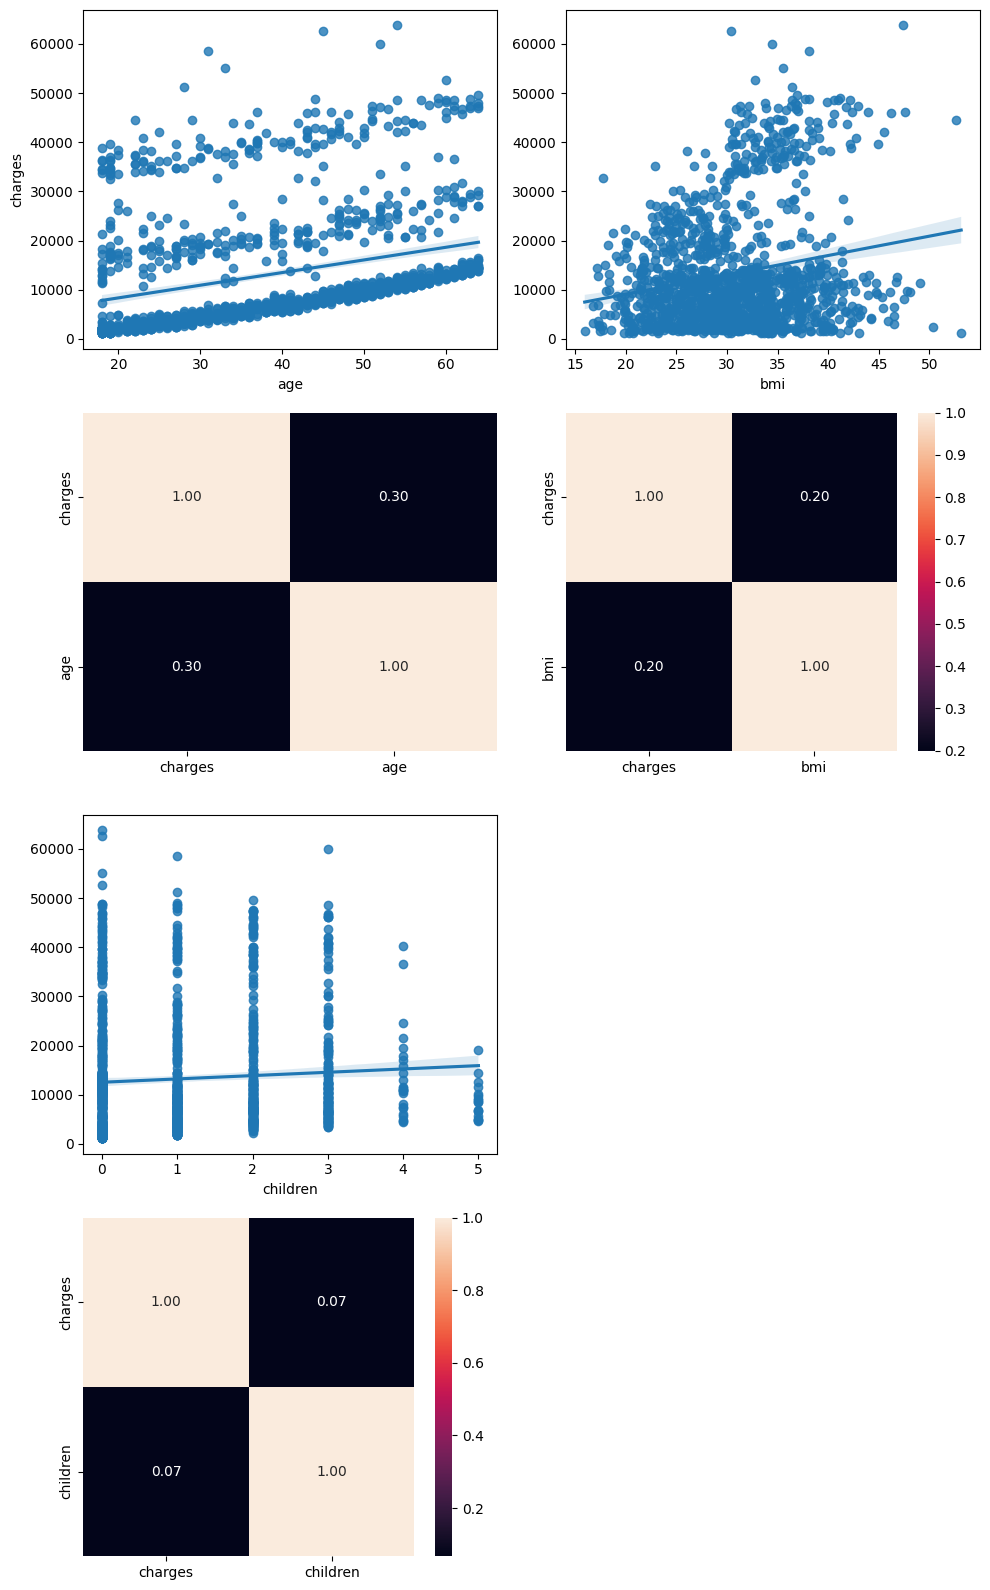

In [16]:
# Numerical to Numerical
fig, axis = plt.subplots(4, 2, figsize = (10, 16))

sns.regplot(ax = axis[0, 0], data = df, x = "age", y = "charges")
sns.heatmap(df[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "bmi", y = "charges").set(ylabel = None)
sns.heatmap(df[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = df, x = "children", y = "charges").set(ylabel = None)
sns.heatmap(df[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)
fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

plt.tight_layout()

plt.show()

Looking at the Numerical-Numerical plots, there isn't a very strong correlation between features, but like one would logically reason, the charges reflected a little stronger correlation with the age of clients at .30.

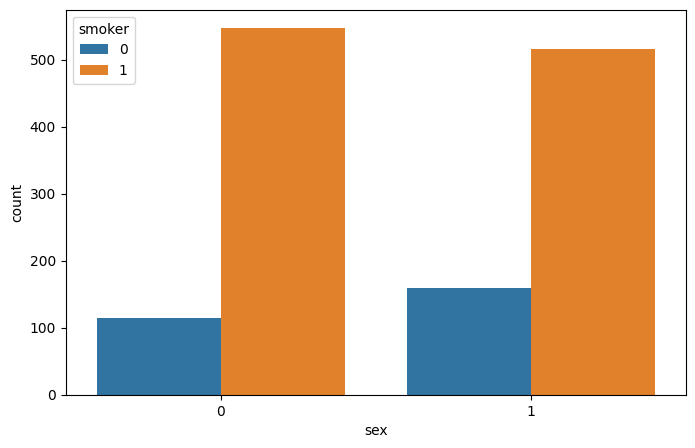

In [17]:
# Categorical-Categorical Analysis

fig, axis = plt.subplots(figsize = (8, 5))
sns.countplot(data = df, x = "sex", hue = "smoker")

plt.show()

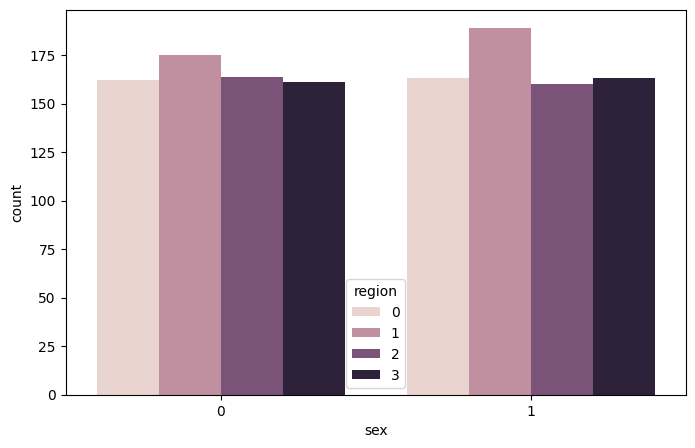

In [18]:
fig, axis = plt.subplots(figsize = (8, 5))
sns.countplot(data = df, x = "sex", hue = "region")

plt.show()

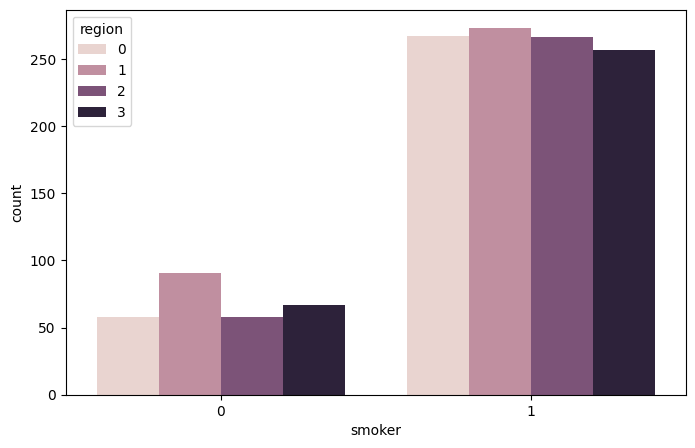

In [19]:
fig, axis = plt.subplots(figsize = (8, 5))
sns.countplot(data = df, x = "smoker", hue = "region")

plt.show()

Again, not a lot of descrepency or significant outliers showing up amongst the categorical comparisons, perhaps just a slightly higher prevelance 
of smokers in the northwest region of the United States.

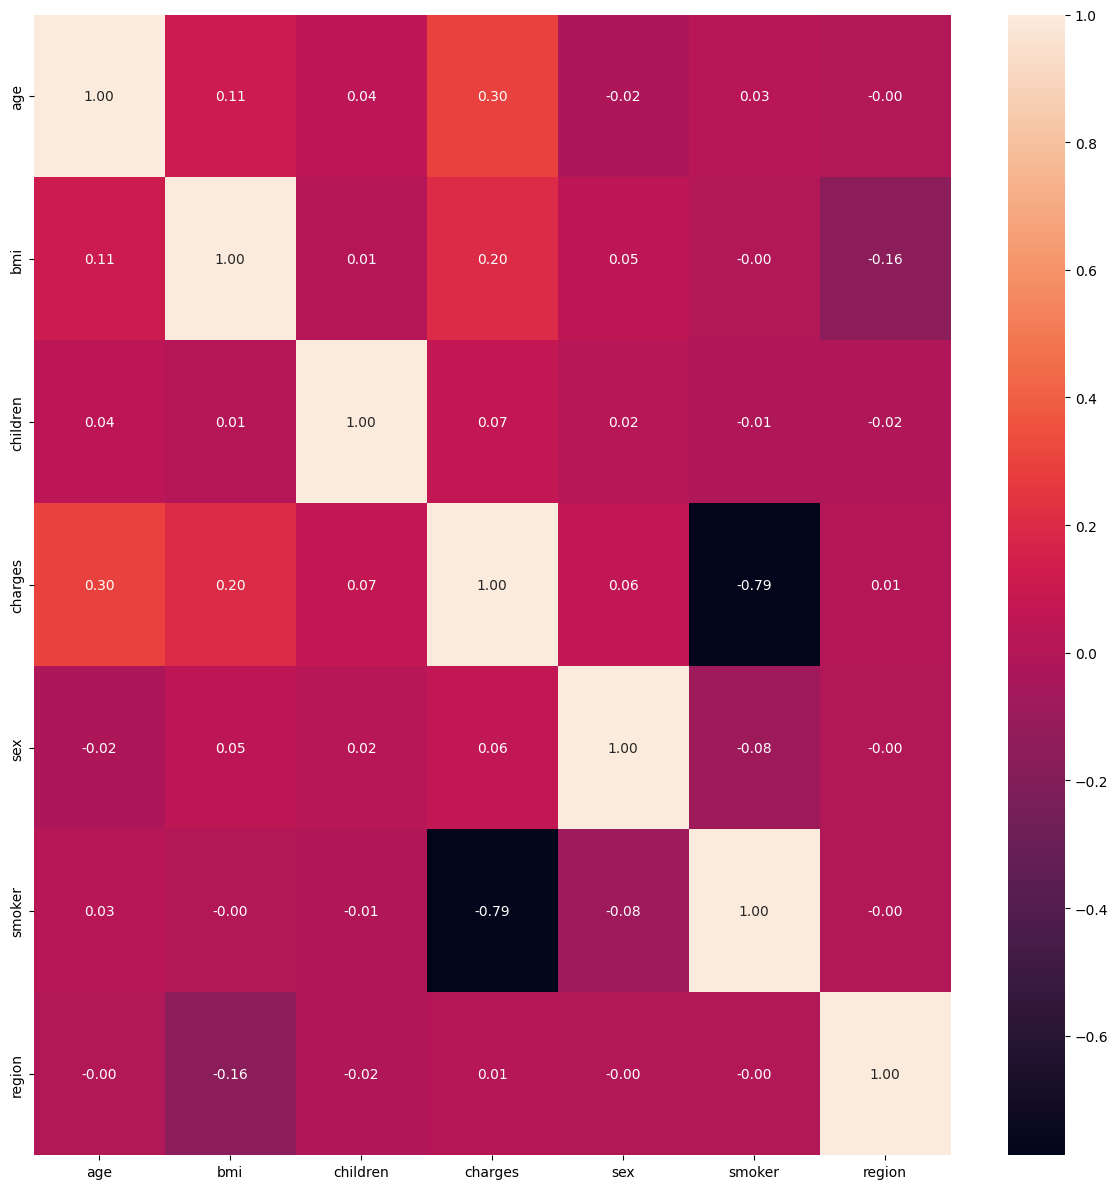

In [20]:
# Numerical-Categorical

fig, axes = plt.subplots(figsize=(12, 12))

# heatmap to understand the correlation between each set of columns
sns.heatmap(df[['age', 'bmi', 'children', 'charges', 'sex', 'smoker', 'region']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Finally some significance how shown up in our plotting, related of course to those who smoke, and the price (both physically and financially) they pay for their habit, resulting in a .79 correlation.  Let's plot another just to visually look at these two features.

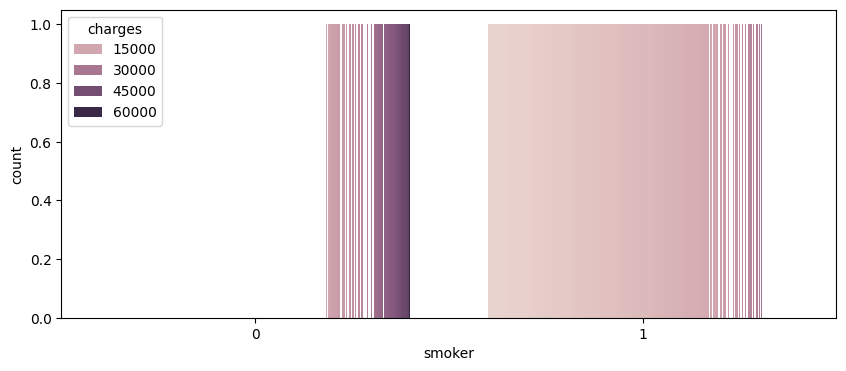

In [21]:
fig, axis = plt.subplots(figsize = (10, 4))
sns.countplot(data = df, x = "smoker", hue = "charges")
plt.show()

So although the smokers only make up 20.5% of the clients, you can see their values are consistently much more expensive than a non-smoker's.

In [22]:
total_charges_by_smoker_status = df.groupby('smoker')['charges'].sum()
total_charges_by_smoker_status

smoker
0    8.781764e+06
1    8.972422e+06
Name: charges, dtype: float64

Some simple math will tell you that:

                 #       %       Total Cost     Cost %

Smokers:        274     20.5     8,781,764      48.9

Non Smokers:    1063    79.5     8,972,422      51.1

Smokers appears to be average about 4X the insurance expense of a non-smoker!

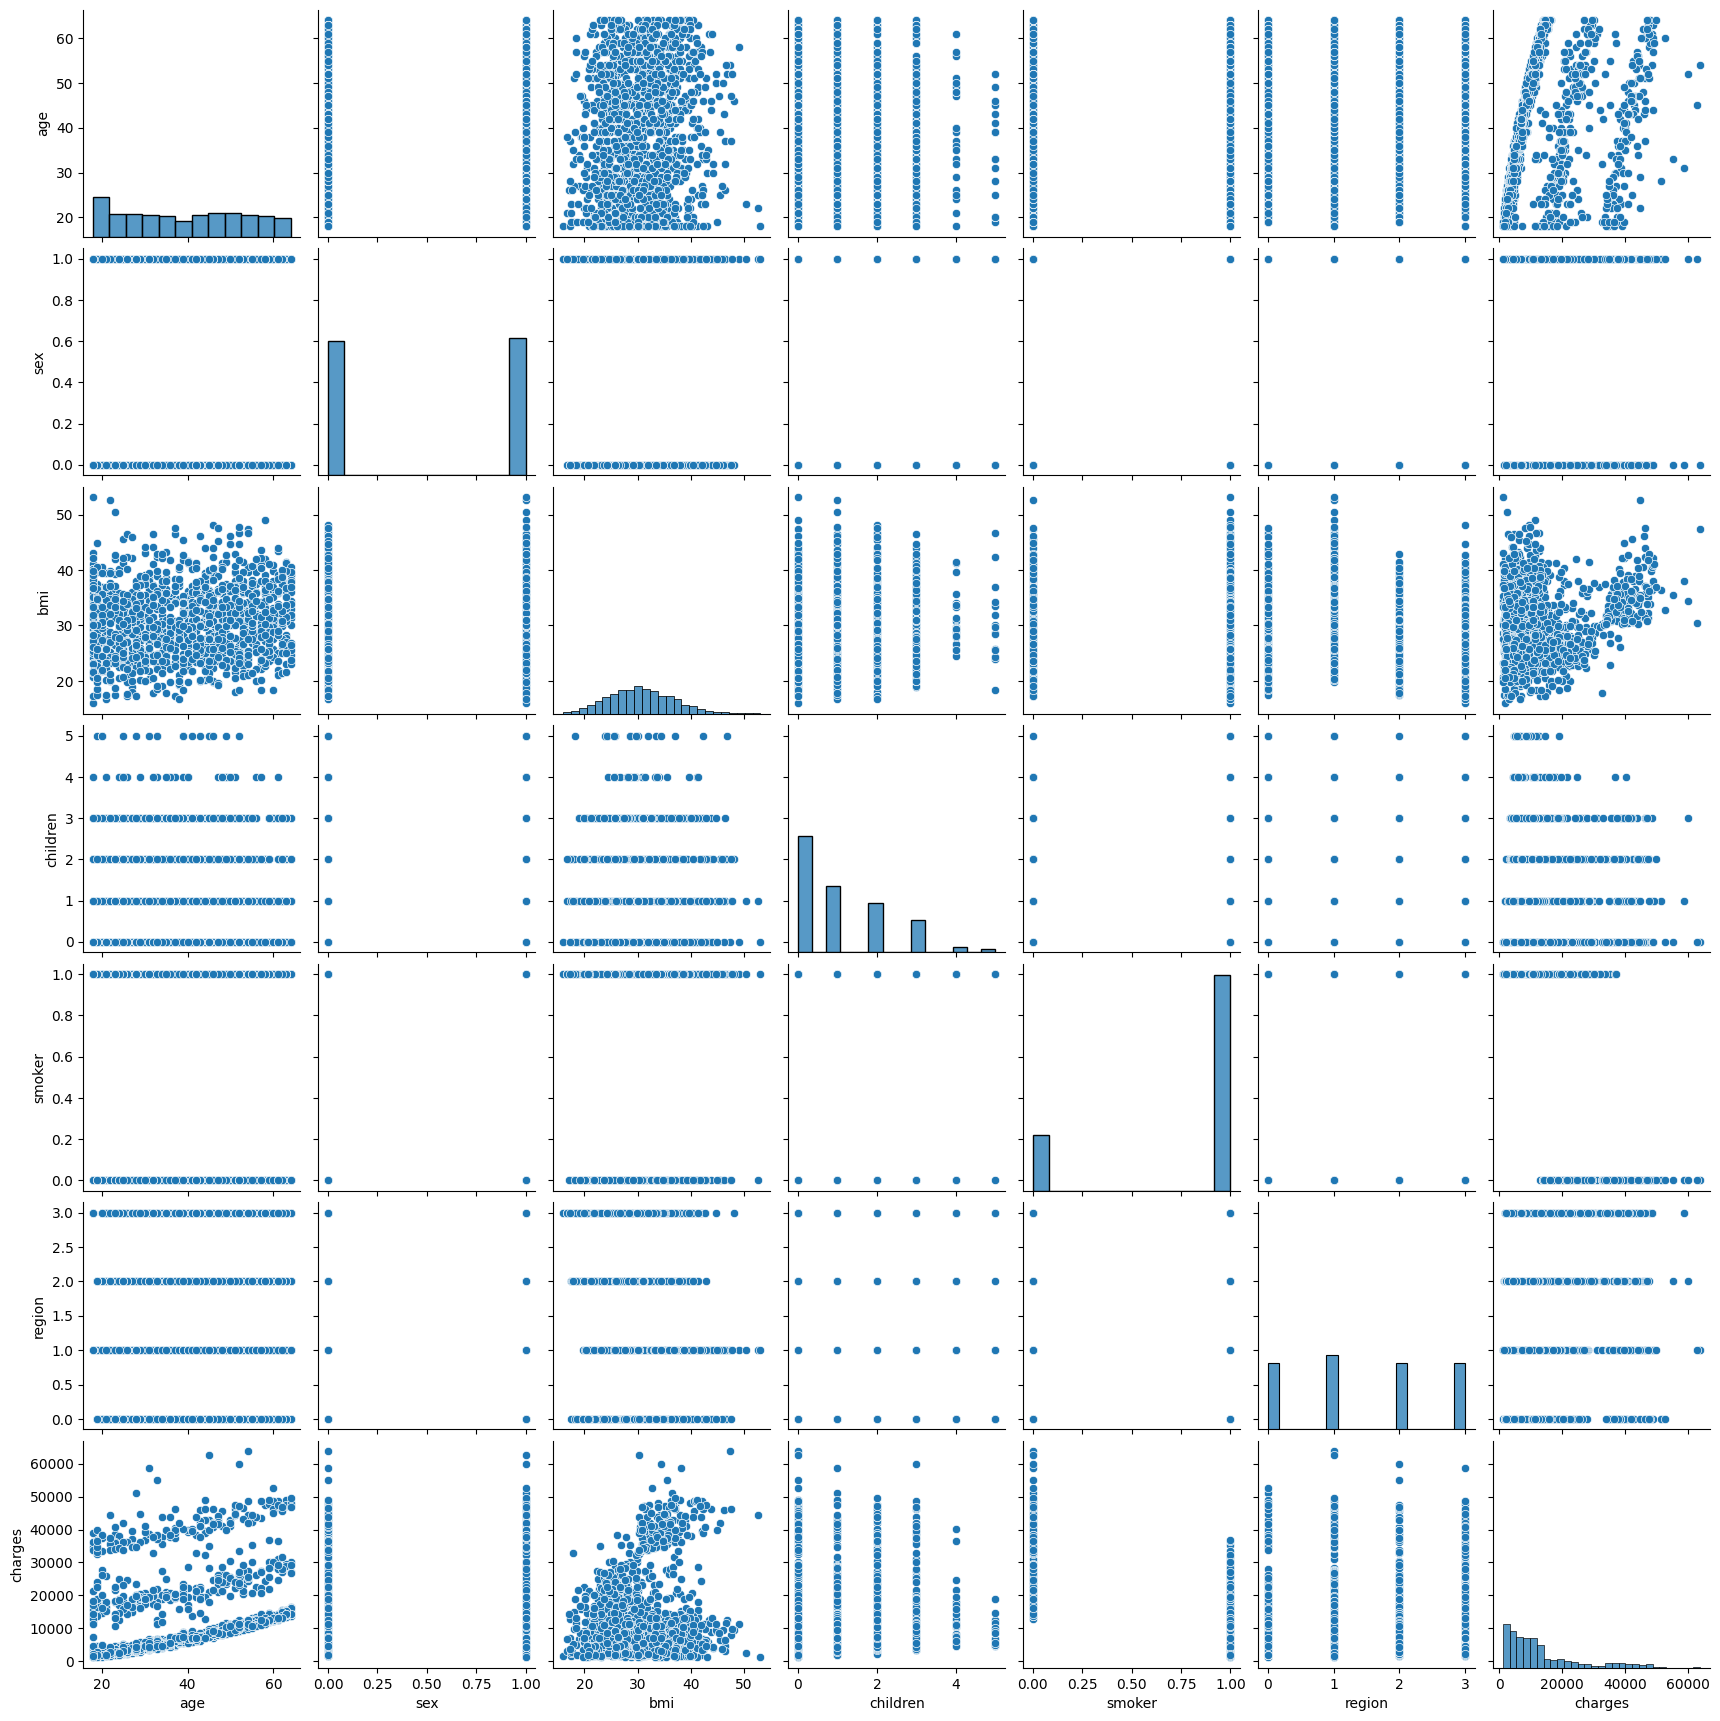

In [23]:
sns.pairplot(data= df)

In [24]:
X = df.drop('charges', axis=1)
y = df['charges']

X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,0,0
1,18,1,33.770,1,1,1
2,28,1,33.000,3,1,1
3,33,1,22.705,0,1,2
4,32,1,28.880,0,1,2


In [25]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1332    10600.54830
1333     2205.98080
1334     1629.83350
1335     2007.94500
1336    29141.36030
Name: charges, Length: 1337, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
X_train

,age,sex,bmi,children,smoker,region
73,58,1,32.010,1,1,1
1322,42,0,40.370,2,0,1
1318,39,0,26.315,2,1,2
262,52,1,24.320,3,0,3
850,61,1,32.300,2,1,2
...,...,...,...,...,...,...
1139,50,1,37.070,1,1,1
1217,46,0,34.600,1,0,0
1184,45,1,23.560,2,1,3
1100,53,1,28.600,3,1,0


In [28]:
y_train

73      11946.62590
1322    43896.37630
1318     7201.70085
262     24869.83680
850     14119.62000
           ...     
1139     9048.02730
1217    41661.60200
1184     8603.82340
1100    11253.42100
988     14571.89080
Name: charges, Length: 1069, dtype: float64

In [29]:
X_test

,age,sex,bmi,children,smoker,region
717,51,0,36.670,2,1,2
740,27,1,29.150,0,0,1
770,53,0,26.700,2,1,0
619,30,1,31.400,1,1,0
994,39,0,23.275,3,1,3
...,...,...,...,...,...,...
134,20,0,28.785,0,1,3
918,35,0,34.210,1,1,1
283,55,0,32.395,1,1,3
1017,54,0,35.815,3,1,2


In [30]:
y_test

717     10848.13430
740     18246.49550
770     11150.78000
619      3659.34600
994      7986.47525
           ...     
134      2457.21115
918      5245.22690
283     11879.10405
1017    12495.29085
1096     1674.63230
Name: charges, Length: 268, dtype: float64

In [31]:
# Addressing any potential outliers in the data set

def replace_outliers(x_train, x_test):
    columns = x_train.columns

    # This loop will replace outliers for each column
    for column in columns:
        # Calculate Q_25 and Q_75 for the column using the data from the x_train set
        Q_25 = x_train[column].quantile(0.25)
        Q_75 = x_train[column].quantile(0.75)

        # Calculate the IQR
        IQR = Q_75 - Q_25

        # Calculate the upper and lower limit
        upper_limit = Q_75 + 1.5*IQR
        lower_limit = Q_25 - 1.5*IQR

        # Replace the outliers that are below the lower limit with the Q_25 value for both the training and test sets
        x_train.loc[x_train[column] < lower_limit, column] = Q_25
        x_test.loc[x_test[column] < lower_limit, column] = Q_25

        # Replace the outliers that are above the upper limit with the Q_75 value for both the training and test sets
        x_train.loc[x_train[column] > upper_limit, column] = Q_75
        x_test.loc[x_test[column] > upper_limit, column] = Q_75
    
    return x_train, x_test

In [32]:
X_train, X_test = replace_outliers(X_train, X_test)

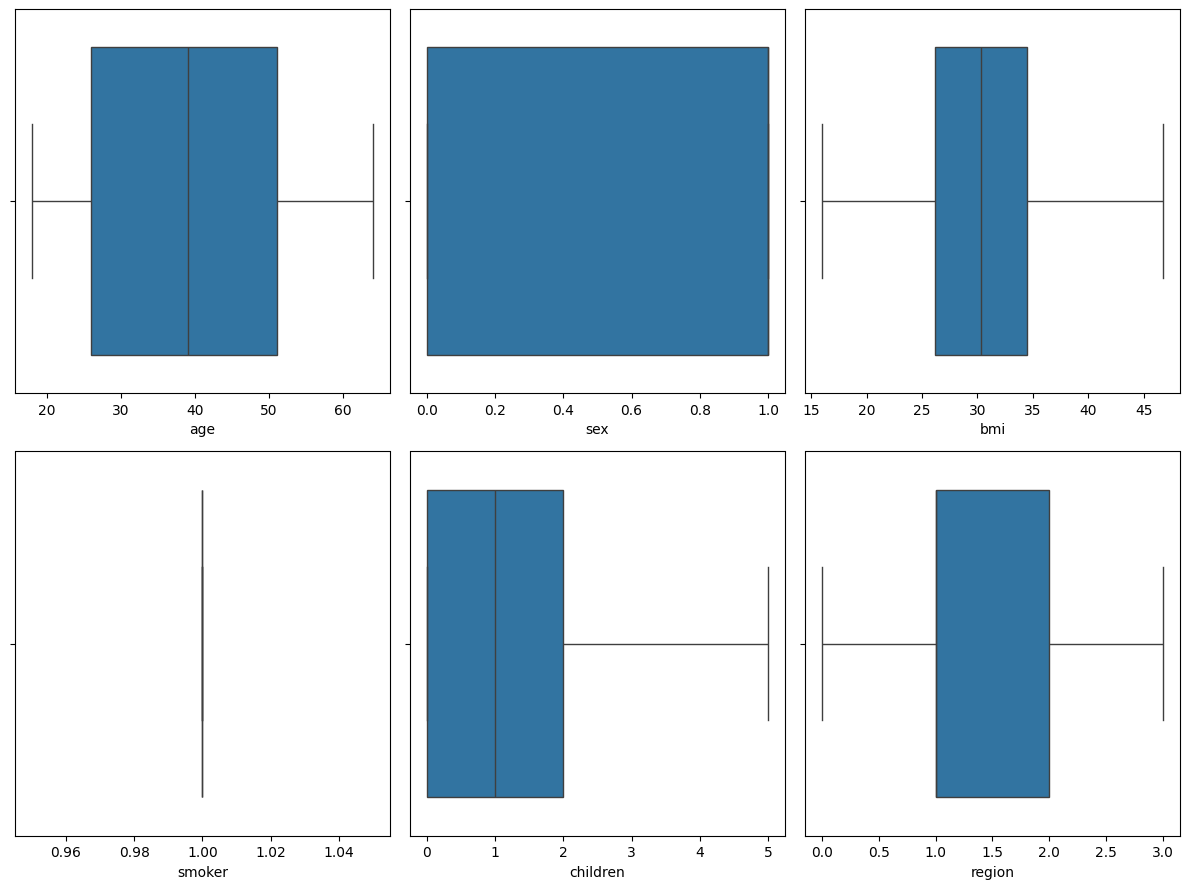

In [33]:
fig, axis = plt.subplots(2, 3, figsize = (12, 9))

sns.boxplot(ax = axis[0, 0], data = X_train, x = "age").set(ylabel = None)
sns.boxplot(ax = axis[0, 1], data = X_train, x = "sex").set(ylabel = None)
sns.boxplot(ax = axis[0, 2], data = X_train, x = "bmi").set(ylabel = None)
sns.boxplot(ax = axis[1, 0], data = X_train, x = "smoker")
sns.boxplot(ax = axis[1, 1], data = X_train, x = "children").set(ylabel = None)
sns.boxplot(ax = axis[1, 2], data = X_train, x = "region").set(ylabel = None)

plt.tight_layout()

plt.show()

In [34]:
# Double checking to make sure there are no missing values within the X_train/X_test
print(f"Total missing values per column in X_train:{X_train.isnull().sum(axis=0)}")
print()
print(f"Total missing values per column in X_test:{X_test.isnull().sum(axis=0)}")

Total missing values per column in X_train:age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

Total missing values per column in X_test:age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64


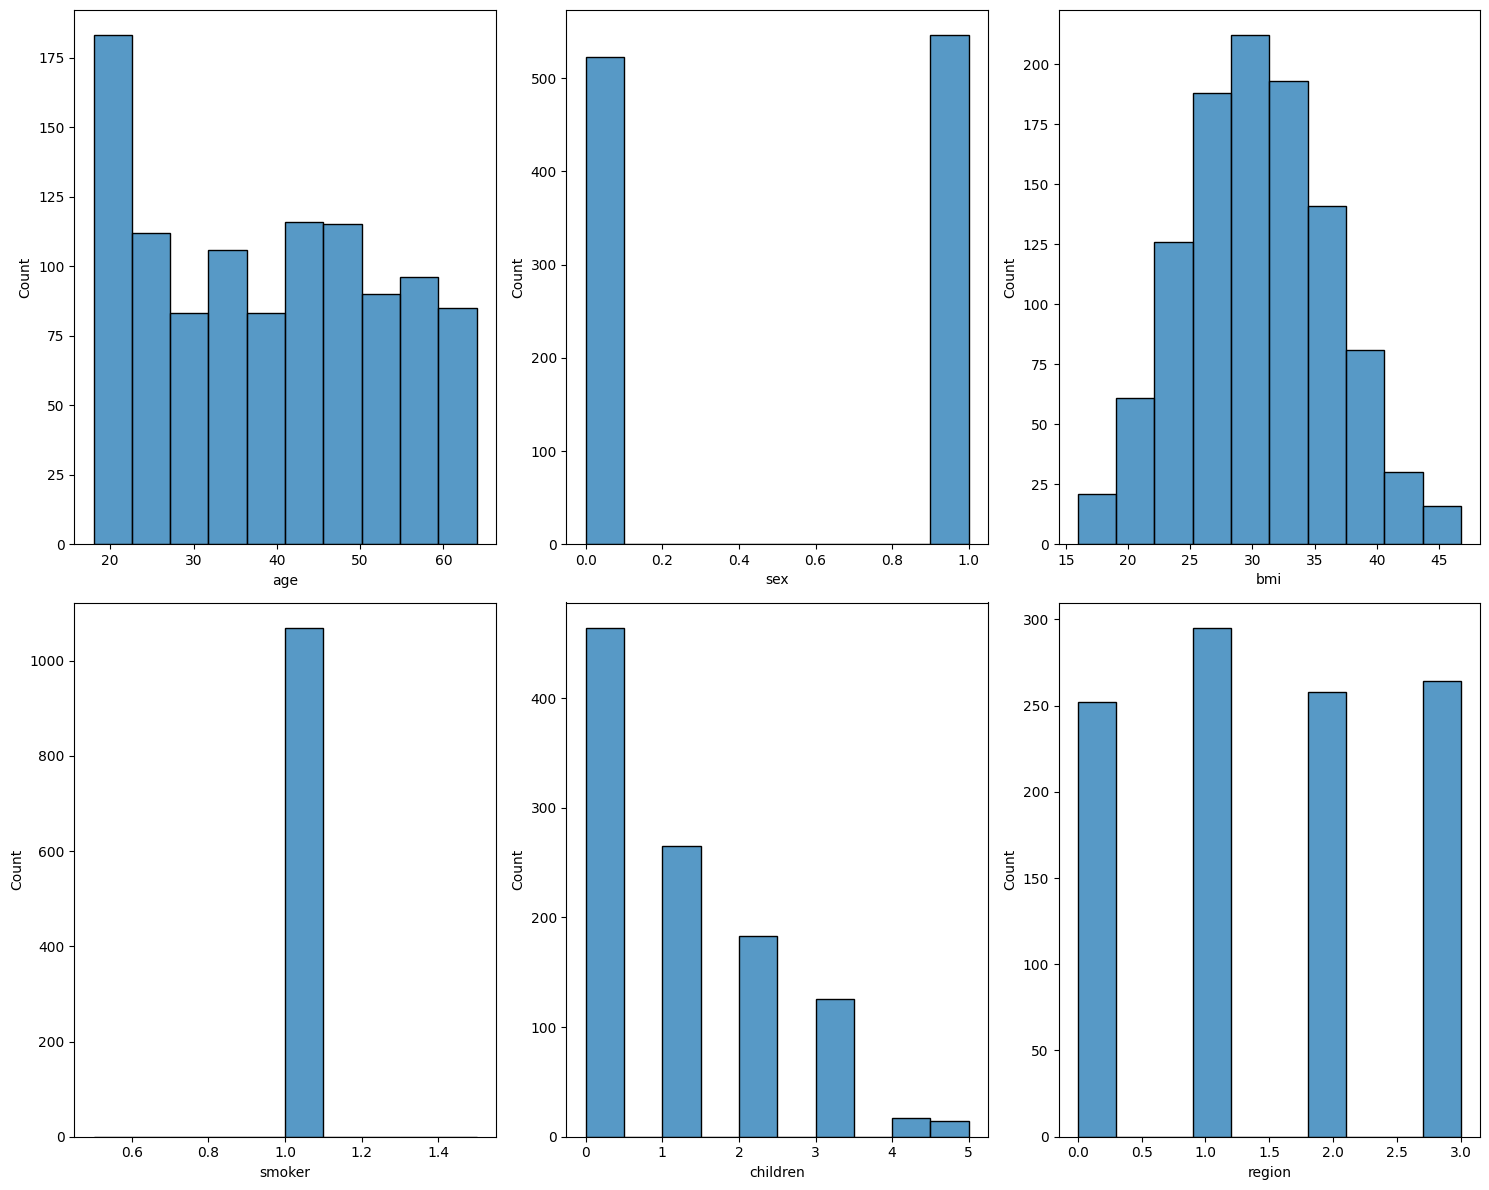

In [35]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

fig, axes = plt.subplots(2, 3, figsize = (15, 12))

sns.histplot(ax = axes[0, 0], data = X_train, x = "age", bins = 10)
sns.histplot(ax = axes[0, 1], data = X_train, x = "sex", bins = 10)
sns.histplot(ax = axes[0, 2], data = X_train, x = "bmi", bins = 10)
sns.histplot(ax = axes[1, 0], data = X_train, x = "smoker", bins = 10)
sns.histplot(ax = axes[1, 1], data = X_train, x = "children", bins = 10)
sns.histplot(ax = axes[1, 2], data = X_train, x = "region", bins = 10)

plt.tight_layout()

plt.show()

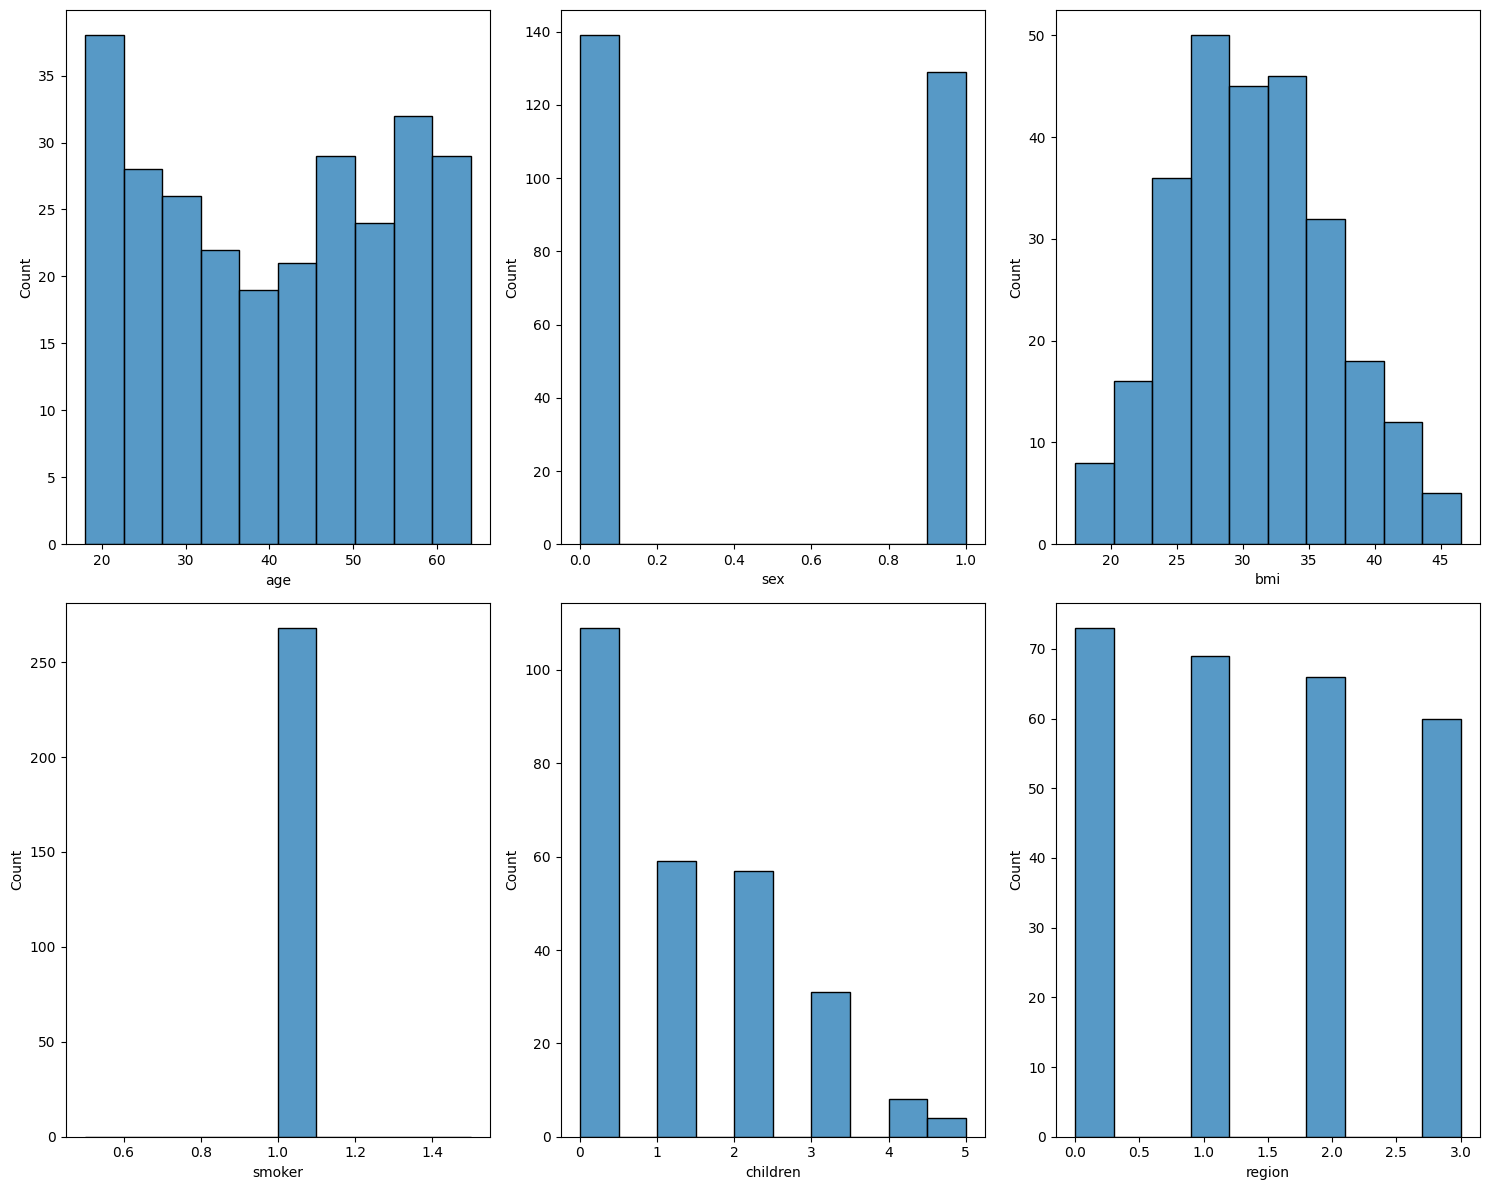

In [36]:
fig, axes = plt.subplots(2, 3, figsize = (15, 12))

sns.histplot(ax = axes[0, 0], data = X_test, x = "age", bins = 10)
sns.histplot(ax = axes[0, 1], data = X_test, x = "sex", bins = 10)
sns.histplot(ax = axes[0, 2], data = X_test, x = "bmi", bins = 10)
sns.histplot(ax = axes[1, 0], data = X_test, x = "smoker", bins = 10)
sns.histplot(ax = axes[1, 1], data = X_test, x = "children", bins = 10)
sns.histplot(ax = axes[1, 2], data = X_test, x = "region", bins = 10)

plt.tight_layout()

plt.show()

In [37]:
scaler.fit(X_train)

StandardScaler()

In [38]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
X_train_scaled

array([[ 1.37427915,  0.97871112,  0.26102003, -0.06114408,  0.        ,
        -0.45311254],
       [ 0.22361973, -1.02175195,  1.68268371,  0.77684332,  0.        ,
        -0.45311254],
       [ 0.00787109, -1.02175195, -0.70744585,  0.77684332,  0.        ,
         0.45396106],
       ...,
       [ 0.43936837,  0.97871112, -1.17594865,  0.77684332,  0.        ,
         1.36103467],
       [ 1.01469808,  0.97871112, -0.31886911,  1.61483072,  0.        ,
        -1.36018614],
       [-1.07087211, -1.02175195, -1.69291726, -0.89913147,  0.        ,
         1.36103467]])

In [40]:
X_test_scaled

array([[ 0.87086566, -1.02175195,  1.05347849,  0.77684332,  0.        ,
         0.45396106],
       [-0.85512347,  0.97871112, -0.2253386 , -0.89913147,  0.        ,
        -0.45311254],
       [ 1.01469808, -1.02175195, -0.64197449,  0.77684332,  0.        ,
        -1.36018614],
       ...,
       [ 1.15853051, -1.02175195,  0.32649138, -0.06114408,  0.        ,
         1.36103467],
       [ 1.0866143 , -1.02175195,  0.90808107,  1.61483072,  0.        ,
         0.45396106],
       [-1.21470454,  0.97871112,  0.56031764, -0.89913147,  0.        ,
        -0.45311254]])

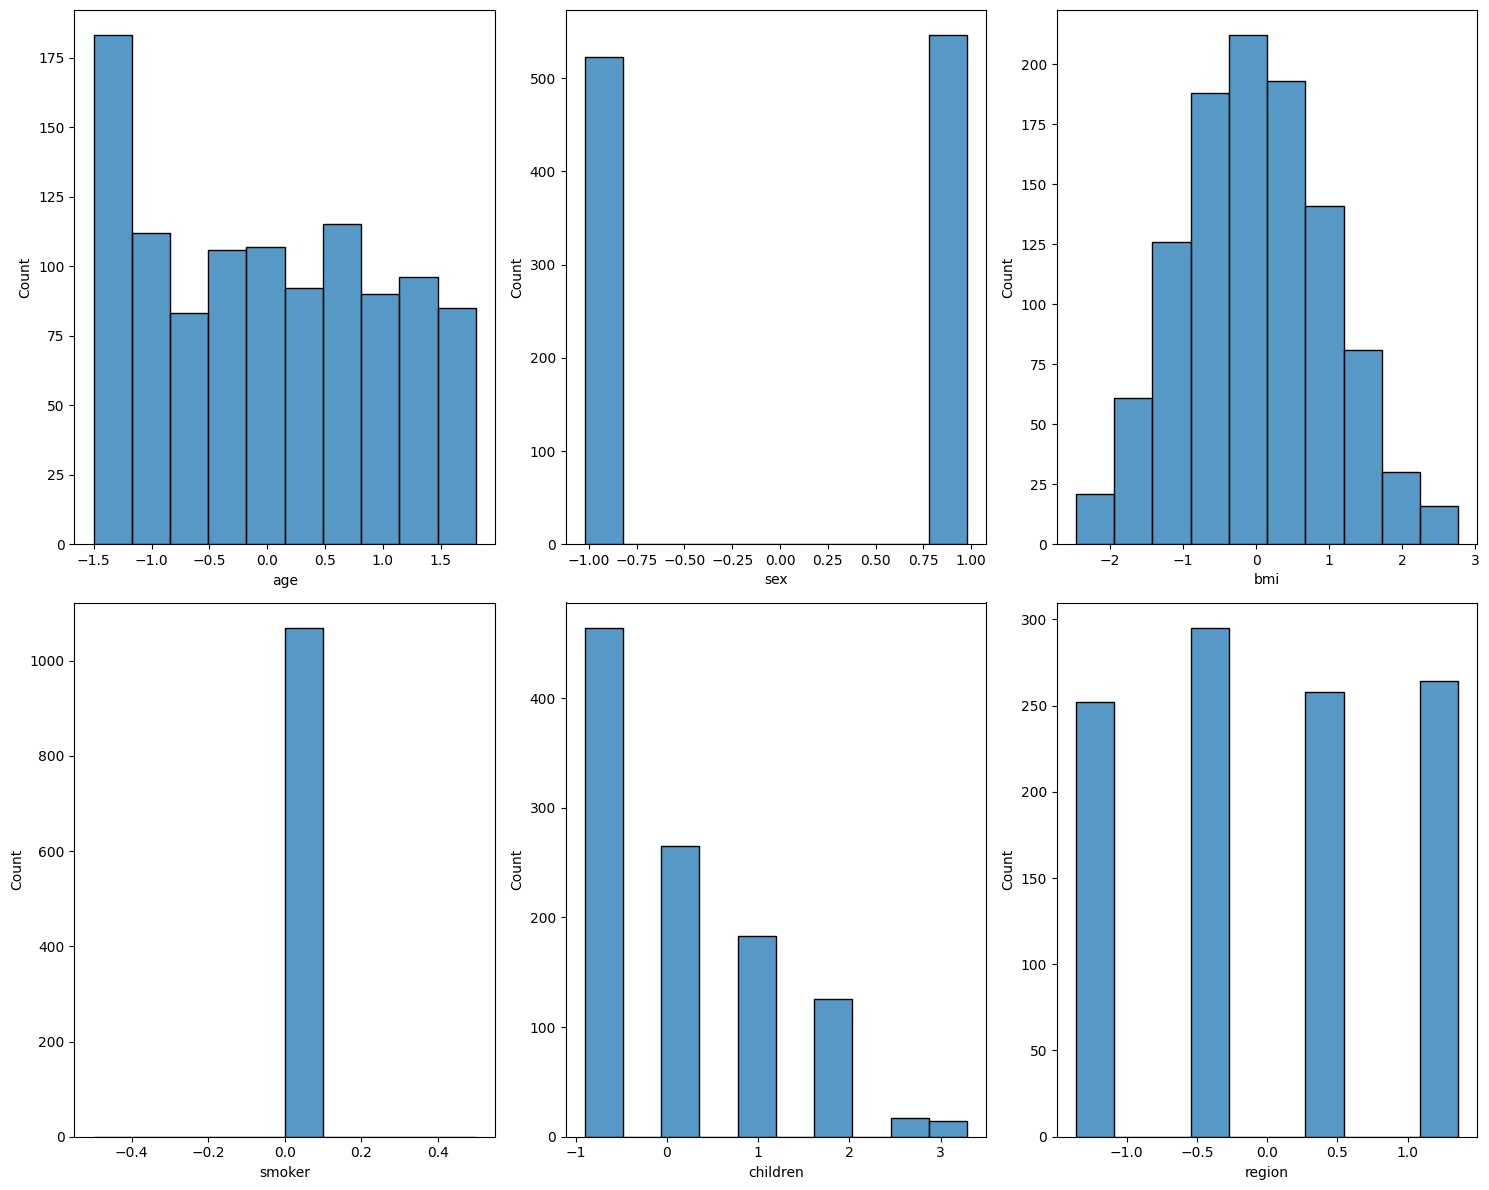

In [41]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

fig, axes = plt.subplots(2, 3, figsize = (15, 12))

sns.histplot(ax = axes[0, 0], data = X_train_scaled_df, x = "age", bins = 10)
sns.histplot(ax = axes[0, 1], data = X_train_scaled_df, x = "sex", bins = 10)
sns.histplot(ax = axes[0, 2], data = X_train_scaled_df, x = "bmi", bins = 10)
sns.histplot(ax = axes[1, 0], data = X_train_scaled_df, x = "smoker", bins = 10)
sns.histplot(ax = axes[1, 1], data = X_train_scaled_df, x = "children", bins = 10)
sns.histplot(ax = axes[1, 2], data = X_train_scaled_df, x = "region", bins = 10)

plt.tight_layout()

plt.show()

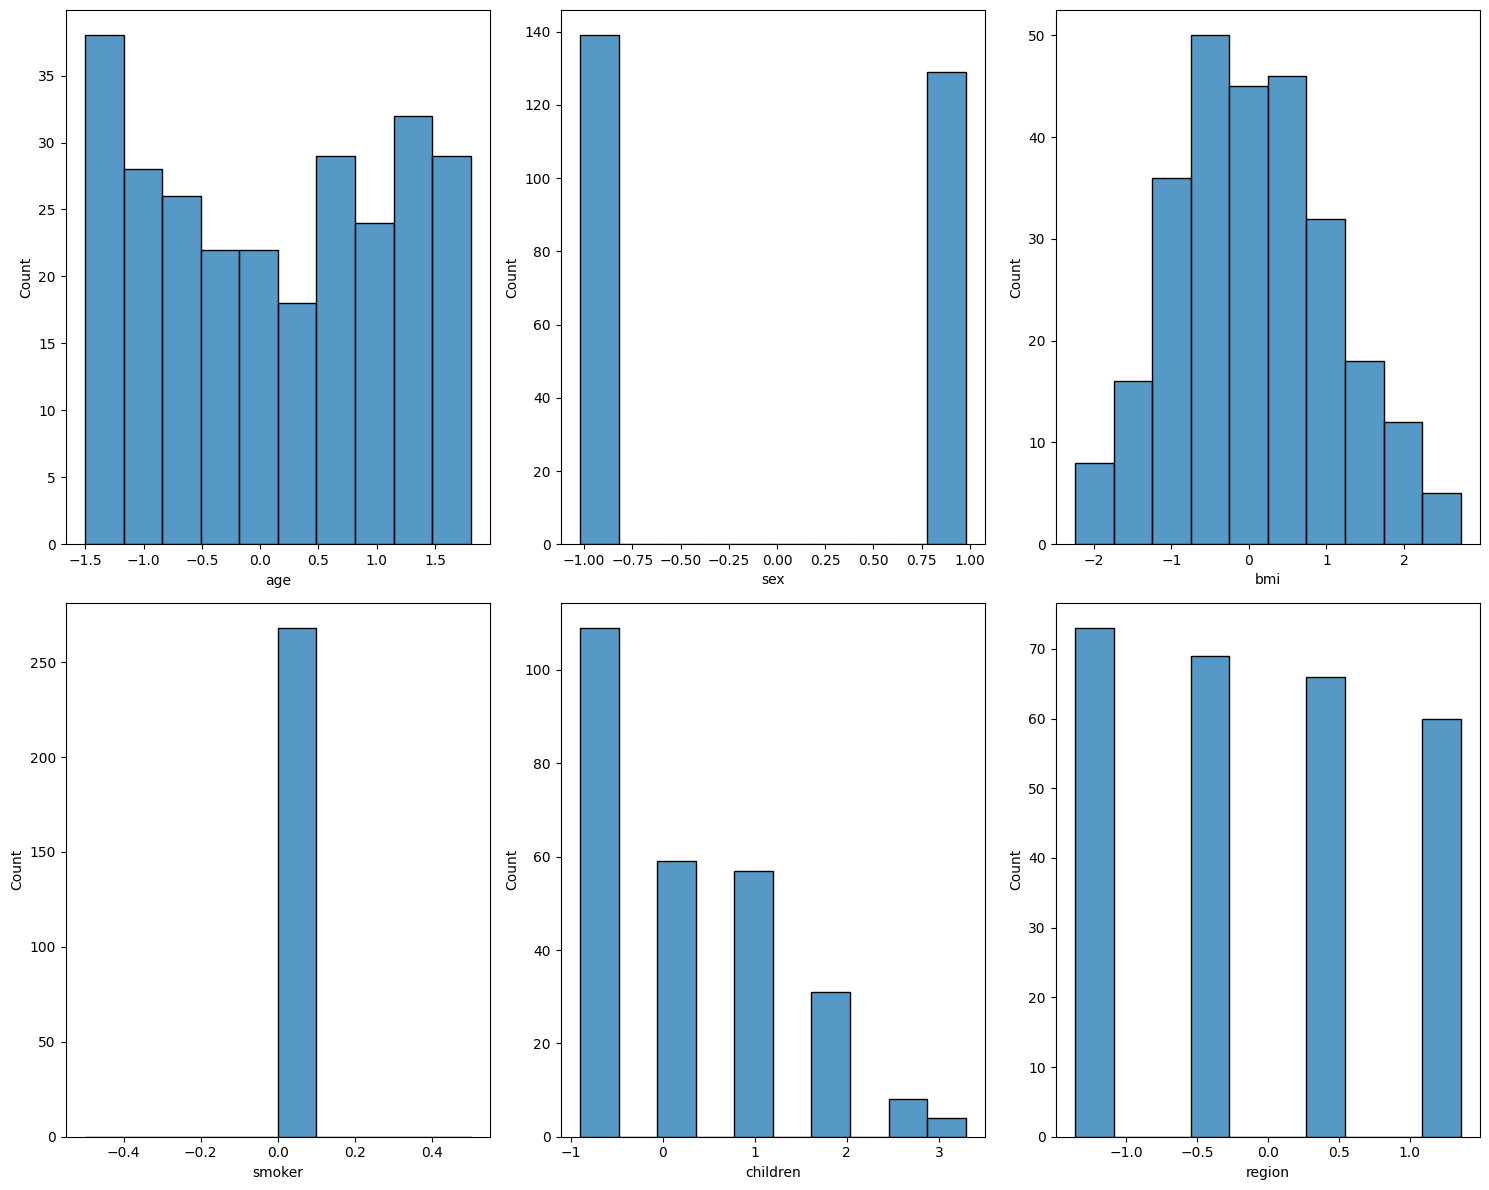

In [42]:
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

fig, axes = plt.subplots(2, 3, figsize = (15, 12))

sns.histplot(ax = axes[0, 0], data = X_test_scaled_df, x = "age", bins = 10)
sns.histplot(ax = axes[0, 1], data = X_test_scaled_df, x = "sex", bins = 10)
sns.histplot(ax = axes[0, 2], data = X_test_scaled_df, x = "bmi", bins = 10)
sns.histplot(ax = axes[1, 0], data = X_test_scaled_df, x = "smoker", bins = 10)
sns.histplot(ax = axes[1, 1], data = X_test_scaled_df, x = "children", bins = 10)
sns.histplot(ax = axes[1, 2], data = X_test_scaled_df, x = "region", bins = 10)

plt.tight_layout()

plt.show()

In [43]:
# Preparing the model

from sklearn.feature_selection import f_regression, SelectKBest

selection_model = SelectKBest(f_regression,k=4)

selection_model.fit(X_train_scaled_df, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,age,sex,bmi,children
0,58.0,1.0,32.010,1.0
1,42.0,0.0,40.370,2.0
2,39.0,0.0,26.315,2.0
3,52.0,1.0,24.320,3.0
4,61.0,1.0,32.300,2.0


In [44]:
X_test_sel.head()

,age,sex,bmi,children
0,51.0,0.0,36.670,2.0
1,27.0,1.0,29.150,0.0
2,53.0,0.0,26.700,2.0
3,30.0,1.0,31.400,1.0
4,39.0,0.0,23.275,3.0


In [45]:
X_train_sel["charges"] = y_train.values
X_test_sel["charges"] = y_test.values
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

In [46]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")

NameError: name 'model' is not defined

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([15799.93062098, 18825.64596717, 10925.95179786, 20598.91956294,
        9427.40361286, 12003.05739666,  6707.22887327, 12019.75733164,
       10908.02586837,  9902.26988124,  7784.97277395,  7702.30925052,
       21485.51903937, 13671.99925994, 13424.48911882, 18880.36250922,
        8779.43336721,  2948.66718627, 12851.48719638, 13958.94978601,
       15328.01226842,  4513.49997116, 19269.12858436, 10113.31457943,
        9465.9739064 , 16772.94870665, 11859.98202172, 15547.20039305,
       14184.06571798,  7261.4102357 ,  2934.42838144, 16092.42889727,
       11267.37512831, 15470.67782857, 13861.42484002, 19625.43497086,
       20112.59777858,  9863.74011547,  4876.37979248,  4279.15937513,
       18181.86641749, 21878.0987643 , 14595.29812164, 13635.73568039,
        6182.89722978,  8666.09236536,  3825.33680165,  5887.18878375,
       11439.27962014, 18571.18011512, 11097.80171242, 13838.38552153,
        6196.06255047,  8219.01232144, 18534.47044715,  7591.43463282,
      

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 120037514.5125893
R2 Score: 0.1105662236293854


1. age. Age of primary beneficiary (numeric)
2. sex. Gender of the primary beneficiary (categorical)
3. bmi. Body mass index (numeric)
4. children. Number of children/dependents covered by health insurance (numeric)
5. smoker. smoker (categorical)
6. region. Beneficiary's residential area in the U.S.: northeast, southeast, southwest, northwest (categorical)
7. charges. Health insurance premium (numerical)

Step 2: Perform a full EDA
This second step is vital to ensure that we keep the variables that are strictly necessary and eliminate those that are not relevant or do not provide information. Use the example Notebook we worked on and adapt it to this use case.

Be sure to conveniently divide the data set into train and test as we have seen in previous lessons.

Step 3: Build a linear regression model
You do not need to optimize the hyperparameters. Start by using a default definition and improve it in the next step.

Step 4: Optimize the previous model
After training the model, if the results are not satisfactory, optimize it if possible.